In [84]:
#Libraries used in the functions below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

In [85]:
#Datasets turned into Pandas DataFrames
dfC = pd.read_csv("courses.csv")
dfSA=pd.read_csv("studentAssessment.csv")
dfSI=pd.read_csv("studentInfo.csv")
dfSR=pd.read_csv("studentRegistration.csv")
dfVLE=pd.read_csv("vle.csv")
dfSVLE=pd.read_csv("studentVle.csv")
dfA=pd.read_csv("assessments.csv")

In [86]:
#A list of all courses
dfC['Course_Section'] = dfC[['code_module', 'code_presentation']].apply(lambda x: '-'.join(x), axis=1)
course_section=list(dfC['Course_Section'] )
course_section

['AAA-2013J',
 'AAA-2014J',
 'BBB-2013J',
 'BBB-2014J',
 'BBB-2013B',
 'BBB-2014B',
 'CCC-2014J',
 'CCC-2014B',
 'DDD-2013J',
 'DDD-2014J',
 'DDD-2013B',
 'DDD-2014B',
 'EEE-2013J',
 'EEE-2014J',
 'EEE-2014B',
 'FFF-2013J',
 'FFF-2014J',
 'FFF-2013B',
 'FFF-2014B',
 'GGG-2013J',
 'GGG-2014J',
 'GGG-2014B']

In [87]:
#This function provides the roster of a specific course and section
dfSI['Course_Section'] = dfSI[['code_module', 'code_presentation']].apply(lambda x: '-'.join(x), axis=1)
def roster(course_section):
    dfClassRoster=dfSI[dfSI['Course_Section']==course_section]
    return list(dfClassRoster['id_student'])
class_roster=roster('BBB-2014B')
class_roster

[25629,
 25997,
 27891,
 38941,
 50069,
 52426,
 55968,
 59725,
 60416,
 60830,
 63721,
 64275,
 72400,
 75118,
 76196,
 78255,
 80001,
 88340,
 89092,
 89778,
 90361,
 92274,
 92341,
 93925,
 97006,
 97865,
 99799,
 103535,
 104238,
 107713,
 108799,
 115452,
 117699,
 119471,
 123270,
 123462,
 125055,
 126608,
 126713,
 130013,
 132972,
 139250,
 140719,
 148427,
 155631,
 157276,
 159293,
 165904,
 170519,
 171751,
 172137,
 183287,
 185021,
 186565,
 187257,
 187601,
 189035,
 189986,
 190352,
 190565,
 194073,
 200506,
 201431,
 202394,
 206003,
 226747,
 228481,
 228784,
 228824,
 231959,
 232539,
 233095,
 233102,
 235097,
 235380,
 235428,
 236161,
 238519,
 242390,
 244064,
 247292,
 247513,
 250123,
 252652,
 260955,
 262294,
 263098,
 264106,
 265958,
 266744,
 268301,
 270256,
 271346,
 271467,
 275006,
 275112,
 279557,
 282161,
 282713,
 283131,
 283564,
 283978,
 284589,
 284593,
 285567,
 286914,
 287004,
 288717,
 288967,
 289108,
 289993,
 290914,
 291844,
 291848,
 

In [176]:
#This function creates a scatterplot that compares the class average for each assessment to an individual student's score
dfA['Course_Section'] = dfA[['code_module', 'code_presentation']].apply(lambda x: '-'.join(x), axis=1)
def CompareMeanScatterplot(course_section,id_student):
    dfCourse_Assessments=dfA[dfA['Course_Section']==course_section]
    assessment=list(dfCourse_Assessments['id_assessment'])
    dictMean={}
    for assess in assessment:
        dfSAMean=dfSA[dfSA['id_assessment']==assess]
        dictMean[assess]=np.mean(dfSAMean['score'])
    dfStudentScore=dfSA[dfSA['id_student']==id_student]
    dfStudentScore=dfStudentScore[['id_assessment','score']]
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    plt.scatter(dfStudentScore['id_assessment'],dfStudentScore['score'] , label = "Student Score")
    plt.scatter(list(dictMean.keys()),list(dictMean.values()) , label = "Class Mean")
    plt.xticks(dfStudentScore['id_assessment'])
    plt.yticks(dfStudentScore['score'])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    fig.suptitle('Scatterplot Comparison: Class Mean and Student Score',
             fontweight ="bold",fontsize=18)
    plt.xlabel('Assessment',fontsize=18)
    plt.ylabel('Score',fontsize=18)
    plt.show()


In [177]:
#Find the roster to find the id of a student in the course.
roster('FFF-2014B')

[26211,
 26269,
 27189,
 27683,
 28808,
 28897,
 30531,
 33600,
 34293,
 36347,
 39882,
 41489,
 42746,
 46148,
 48635,
 53136,
 53709,
 54867,
 58221,
 63958,
 67986,
 72114,
 74521,
 74524,
 77845,
 77998,
 79683,
 81216,
 82201,
 83603,
 84299,
 85874,
 99670,
 101634,
 104316,
 106747,
 108207,
 108822,
 108949,
 110529,
 115875,
 116174,
 116621,
 117510,
 117550,
 124018,
 128132,
 128968,
 130992,
 131538,
 132157,
 132477,
 133104,
 133322,
 134847,
 134851,
 136054,
 136944,
 140108,
 141430,
 150121,
 152626,
 153611,
 155158,
 156788,
 160262,
 160472,
 163332,
 163962,
 167106,
 174155,
 178179,
 179081,
 181719,
 183429,
 190418,
 190829,
 190930,
 191590,
 193803,
 195515,
 195552,
 197097,
 197538,
 203568,
 227297,
 228138,
 228258,
 228729,
 232286,
 234796,
 237182,
 237370,
 239345,
 242254,
 242998,
 244961,
 247714,
 247940,
 251375,
 255878,
 256740,
 257104,
 258737,
 260062,
 261265,
 264298,
 266536,
 268649,
 268845,
 269730,
 271702,
 272701,
 276265,
 277577

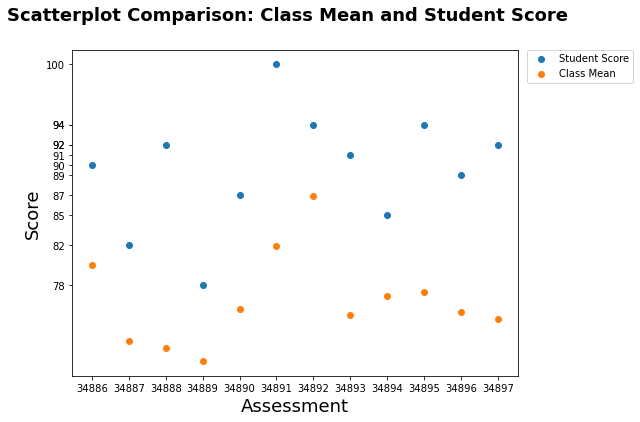

In [178]:
#We choose a student above and we can compare their scores to the mean of the class per assessment.
CompareMeanScatterplot('FFF-2014B',190418)

In [179]:
dfA['Course_Section'] = dfA[['code_module', 'code_presentation']].apply(lambda x: '-'.join(x), axis=1)
def CompareMeanBarplot(course_section,id_student):
    dfCourse_Assessments=dfA[dfA['Course_Section']==course_section]
    assessment=list(dfCourse_Assessments['id_assessment'])
    dictMean={}
    for assess in assessment:
        dfSAMean=dfSA[dfSA['id_assessment']==assess]
        dictMean[assess]=np.mean(dfSAMean['score'])
    dfStudentScore=dfSA[dfSA['id_student']==id_student]
    dfStudentScore=dfStudentScore[['id_assessment','score']]
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    width=0.4
    plt.bar(dfStudentScore['id_assessment'],dfStudentScore['score'] , label = "Student Score",width=0.4)
    plt.bar([x+width for x in list(dictMean.keys())],list(dictMean.values()) , label = "Class Mean",width=0.4)
    plt.xticks(dfStudentScore['id_assessment'])
    #plt.yticks(dfStudentScore['score'])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    fig.suptitle('Bar Graph Comparison: Class Mean and Student Score',
             fontweight ="bold",fontsize=18)
    plt.xlabel('Assessment',fontsize=18)
    plt.ylabel('Score',fontsize=18)
    plt.show()

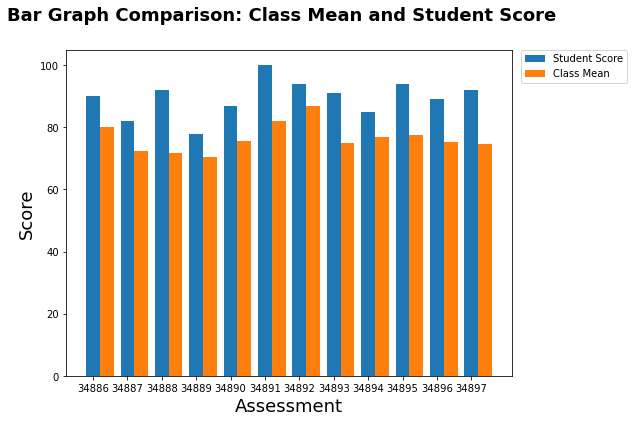

In [180]:
CompareMeanBarplot('FFF-2014B',190418)